<h1>Lapses example</h1>

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('data/Lapse_statistics.xlsx')

In [3]:
data.head()

,Age,Area,Tenure,Premium_category,Lapses
0,31,2,114,4,0
1,18,2,10,6,1
2,62,2,136,1,0
3,45,2,48,5,0
4,22,2,58,6,1


In [4]:
data.describe()

,Age,Area,Tenure,Premium_category,Lapses
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.673800,1.518000,70.710600,5.551600,0.357000
std,14.919394,0.523575,41.388228,2.896449,0.479163
min,18.000000,1.000000,0.000000,1.000000,0.000000
25%,31.000000,1.000000,35.000000,3.000000,0.000000
50%,44.000000,2.000000,70.000000,6.000000,0.000000
75%,56.000000,2.000000,106.000000,8.000000,1.000000
max,70.000000,3.000000,143.000000,10.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Age                 5000 non-null int64
Area                5000 non-null int64
Tenure              5000 non-null int64
Premium_category    5000 non-null int64
Lapses              5000 non-null int64
dtypes: int64(5)
memory usage: 195.4 KB


In [6]:
y = data.Lapses
X = data.drop(['Lapses'], axis = 1)

In [7]:
X.drop(['Age', 'Area'], axis = 1, inplace=True)
X['Tenure*Category'] = X.Tenure * X.Premium_category

In [11]:
X_sm = sm.add_constant(X)

binom_model = sm.GLM(y, X_sm, family=sm.families.Binomial())
binom_results = binom_model.fit()
binom_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
=================================================================
Model:               GLM              AIC:            5819.4353  
Link Function:       logit            BIC:            -36740.4619
Dependent Variable:  Lapses           Log-Likelihood: -2905.7    
Date:                2019-06-24 16:56 LL-Null:        -3258.4    
No. Observations:    5000             Deviance:       5811.4     
Df Model:            3                Pearson chi2:   4.72e+03   
Df Residuals:        4996             Scale:          1.0000     
Method:              IRLS                                        
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -0.1776   0.1337  -1.3282 0.1841 -0.4396  0.0845
Tenure           -0.0242   0.0020 -12.3363 0.0000 -0.0281 -0.0204
Premium_category  0.1019   0.0209   4.8795 0.0000  0.0610  0.1429
Tenure*Category   0.0015   0.0003   5.4036 0.0000  0.0010  0.0021
=================================================================

"""

In [16]:
pred =  binom_results.predict(X_sm)

In [17]:
y[:10], pred[:10]

(0    0
 1    1
 2    0
 3    0
 4    1
 5    1
 6    1
 7    1
 8    0
 9    0
 Name: Lapses, dtype: int64, 0    0.138875
 1    0.570694
 2    0.040782
 3    0.387250
 4    0.393636
 5    0.576489
 6    0.380627
 7    0.271665
 8    0.483018
 9    0.620542
 dtype: float64)

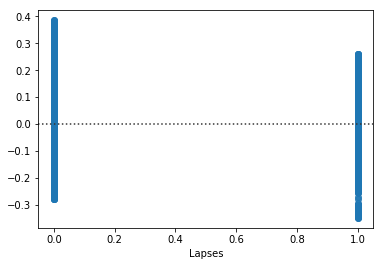

In [18]:
seaborn.residplot(y, pred)

<h1>frequency</h1>

In [23]:
data = pd.read_excel('data/Freq_statistics.xlsx')

In [24]:
data.head()

,Age,Experience,Horse_power,Weight,Area,Exposed,Claims
0,18,0,78,0.74,2,0.827397,1
1,18,0,79,0.82,2,0.594521,1
2,18,0,80,0.74,2,0.816438,1
3,18,0,80,0.83,2,0.621918,1
4,18,0,86,0.84,2,0.904110,1


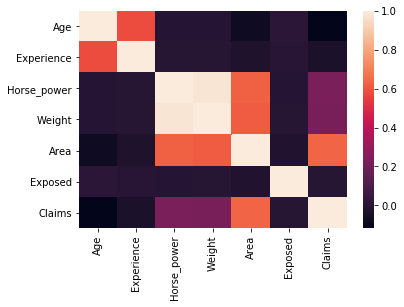

In [27]:
seaborn.heatmap(data.corr())

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 7 columns):
Age            4982 non-null int64
Experience     4982 non-null int64
Horse_power    4982 non-null int64
Weight         4982 non-null float64
Area           4982 non-null int64
Exposed        4982 non-null float64
Claims         4982 non-null int64
dtypes: float64(2), int64(5)
memory usage: 272.5 KB


In [29]:
y = data.Claims
offset = np.log(data.Exposed)
X = data.drop(['Claims', 'Exposed', 'Horse_power', 'Weight'], axis = 1)

In [30]:
X['Age*Exp'] = X.Age*X.Experience
X['Age*Area'] = X.Age*X.Area
X['Exp*Area'] = X.Experience*X.Area
X['Age*Exp*Area'] = X.Age*X.Experience*X.Area
X_sm = sm.add_constant(X)

/home/justm/anaconda3/envs/uw_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
model = sm.GLM(y, X_sm, family=sm.families.Poisson())
model_results = model.fit()
model_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
================================================================
Model:              GLM              AIC:            4693.8465  
Link Function:      log              BIC:            -40416.5809
Dependent Variable: Claims           Log-Likelihood: -2338.9    
Date:               2019-06-24 17:07 LL-Null:        -3286.7    
No. Observations:   4982             Deviance:       1930.0     
Df Model:           7                Pearson chi2:   1.74e+03   
Df Residuals:       4974             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -2.4278   0.3990 -6.0844 0.0000 -3.2099 -1.6458
Age              -0.0529   0.0098 -5.4163 0.0000 -0.0721 -0.0338
Experience       -0.7046   0.1068 -6.5993 0.0000 -0.9139 -0.4954
Area              1.2248   0.1857  6.5943 0.0000  0.8607  1.5888
Age*Exp           0.0114   0.0016  7.0524 0.0000  0.0082  0.0146
Age*Area          0.0188   0.0046  4.1114 0.0000  0.0098  0.0277
Exp*Area          0.2299   0.0490  4.6883 0.0000  0.1338  0.3260
Age*Exp*Area     -0.0038   0.0007 -5.0546 0.0000 -0.0052 -0.0023
================================================================

"""

In [34]:
frequency = model_results.predict(X_sm)
pred = frequency * np.exp(offset)
y[:10], pred[:10], frequency[:10]

(0    1
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: Claims, dtype: int64, 0    0.640984
 1    0.460574
 2    0.632494
 3    0.481799
 4    0.700413
 5    0.331104
 6    0.422370
 7    0.702535
 8    0.734372
 9    0.759842
 dtype: float64, 0    0.774699
 1    0.774699
 2    0.774699
 3    0.774699
 4    0.774699
 5    0.774699
 6    0.774699
 7    0.774699
 8    0.774699
 9    0.774699
 dtype: float64)

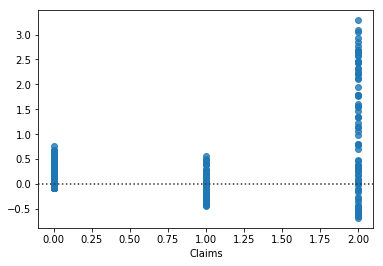

In [35]:
seaborn.residplot(y, pred)

<h1>Sev</h1>

In [37]:
data = pd.read_excel('data/Sev_statistics.xlsx')

In [38]:
data.head()

,Age,Experience,Horse_power,Weight,Area,Exposed,Claims,Cost
0,18,0,78,0.74,2,0.827397,1,2043
1,18,0,79,0.82,2,0.594521,1,2162
2,18,0,80,0.74,2,0.816438,1,2153
3,18,0,80,0.83,2,0.621918,1,2209
4,18,0,86,0.84,2,0.904110,1,1634


In [39]:
data.describe()

,Age,Experience,Horse_power,Weight,Area,Exposed,Claims,Cost
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,40.823180,6.738484,151.245914,1.310208,2.045319,0.697903,1.067608,1767.109212
std,18.290711,9.166853,40.233571,0.327301,0.208081,0.233190,0.251165,464.660260
min,18.000000,0.000000,75.000000,0.610000,2.000000,0.219178,1.000000,1001.000000
25%,23.000000,1.000000,116.000000,1.030000,2.000000,0.493836,1.000000,1438.250000
50%,38.000000,3.000000,159.000000,1.380000,2.000000,0.746575,1.000000,1737.000000
75%,58.000000,7.000000,190.000000,1.610000,2.000000,0.904110,1.000000,1992.000000
max,70.000000,48.000000,199.000000,1.790000,3.000000,1.775342,2.000000,4445.000000


In [40]:
y = data.Cost
X = data.drop(['Claims', 'Cost', 'Exposed'], axis = 1)

In [41]:
import statsmodels.api as sm
offset = np.log(data.Claims.values)


X_sm = sm.add_constant(X)

binom_model = sm.GLM(y, X_sm, family=sm.families.Gamma(link=sm.genmod.families.links.log),
                    offset = offset)
binom_results = binom_model.fit()
binom_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            19484.8668
Link Function:      log              BIC:            -9603.2308
Dependent Variable: Cost             Log-Likelihood: -9736.4   
Date:               2019-06-24 17:12 LL-Null:        -10257.   
No. Observations:   1346             Deviance:       51.325    
Df Model:           5                Pearson chi2:   48.2      
Df Residuals:       1340             Scale:          0.035939  
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           8.3613   0.0573 146.0400 0.0000  8.2491  8.4735
Age             0.0001   0.0004   0.2991 0.7649 -0.0006  0.0008
Experience     -0.0010   0.0007  -1.3724 0.1700 -0.0025  0.0004
Horse_power    -0.0012   0.0007  -1.6591 0.0971 -0.0026  0.0002
Weight         -0.2302   0.0889  -2.5893 0.0096 -0.4045 -0.0560
Area           -0.2246   0.0250  -8.9907 0.0000 -0.2736 -0.1756
===============================================================

"""

In [42]:
pred = binom_results.predict(X_sm)*np.exp(offset)
y[:10], pred[:10]

(0    2043
 1    2162
 2    2153
 3    2209
 4    1634
 5    1766
 6    1949
 7    1972
 8    2348
 9    2141
 Name: Cost, dtype: int64, 0    2100.828305
 1    2060.017555
 2    2095.788492
 3    2052.814025
 4    2033.389230
 5    2019.394817
 6    2028.511200
 7    2044.615031
 8    2023.442896
 9    2022.837087
 dtype: float64)

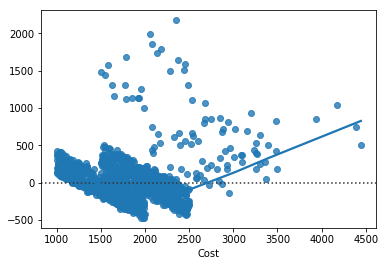

In [43]:
seaborn.residplot(y, pred, lowess=True)